In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

import pickle


# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import time


NAME = "CNN-second-dataset-balance-15epochs-one-dropout-3cov2d-x200"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))




pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0


# keras part .............

# Generate dummy data
#import numpy as np
#data = np.random.random((1000, 100))
#labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)

# Train the model, iterating on the data in batches of 32 samples
#model.fit(data, one_hot_labels, epochs=10, batch_size=32)

#end keras part...........



Using TensorFlow backend.


Train on 90 samples, validate on 10 samples
Epoch 1/5
90/90 [==============================] - 6s 67ms/step - loss: 1.0592 - acc: 0.4222 - val_loss: 1.0904 - val_acc: 0.5000
Epoch 2/5
90/90 [==============================] - 5s 58ms/step - loss: 1.0727 - acc: 0.4111 - val_loss: 1.1428 - val_acc: 0.2000
Epoch 3/5
90/90 [==============================] - 5s 58ms/step - loss: 1.0702 - acc: 0.3667 - val_loss: 1.1774 - val_acc: 0.2000
Epoch 4/5
90/90 [==============================] - 5s 57ms/step - loss: 1.0347 - acc: 0.4000 - val_loss: 1.1423 - val_acc: 0.2000
Epoch 5/5
90/90 [==============================] - 5s 57ms/step - loss: 1.0222 - acc: 0.4778 - val_loss: 1.1717 - val_acc: 0.2000
dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


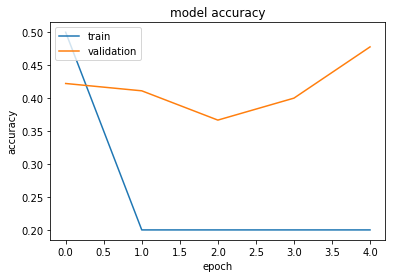

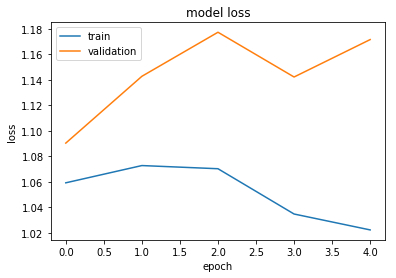

100/100 [==============================] - 2s 22ms/step
1.0374273347854615
0.41
0.6206193398606202
{0: 0.4953310696095077}
{0: 0.4953310696095077, 1: 0.5985944605208765}
{0: 0.4953310696095077, 1: 0.5985944605208765, 2: 0.7679324894514767}


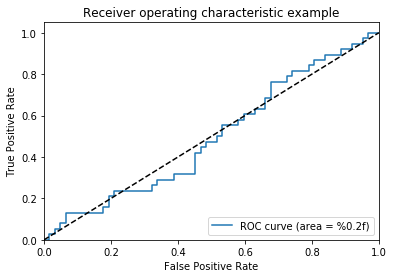

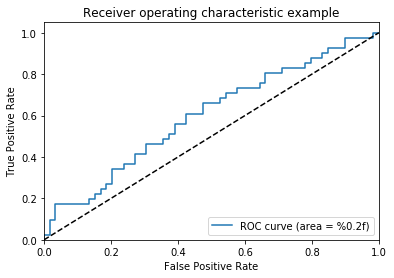

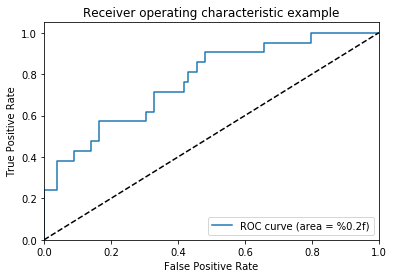

confusion matrix of :  [[ 0 38  0]
 [ 0 41  0]
 [ 1 20  0]]
 confusion matrix, without normalized
[[ 0 38  0]
 [ 0 41  0]
 [ 1 20  0]]
Train on 90 samples, validate on 10 samples
Epoch 1/5
90/90 [==============================] - 7s 78ms/step - loss: 1.0942 - acc: 0.4222 - val_loss: 1.2017 - val_acc: 0.5000
Epoch 2/5
90/90 [==============================] - 5s 57ms/step - loss: 1.0349 - acc: 0.4889 - val_loss: 1.1738 - val_acc: 0.1000
Epoch 3/5
90/90 [==============================] - 5s 59ms/step - loss: 1.0644 - acc: 0.3556 - val_loss: 1.1334 - val_acc: 0.1000
Epoch 4/5
90/90 [==============================] - 6s 68ms/step - loss: 1.0347 - acc: 0.4333 - val_loss: 1.1817 - val_acc: 0.1000
Epoch 5/5
90/90 [==============================] - 5s 58ms/step - loss: 1.0324 - acc: 0.4444 - val_loss: 1.2485 - val_acc: 0.4000
dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


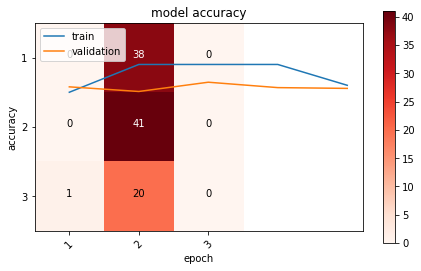

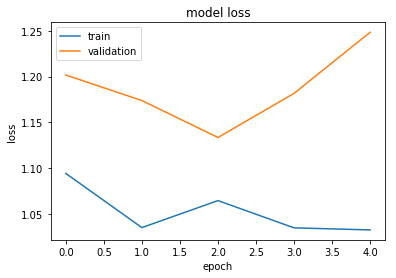

100/100 [==============================] - 2s 23ms/step
1.0245339250564576
0.43
0.6628633153448112
{0: 0.45977011494252873}
{0: 0.45977011494252873, 1: 0.7477931904161413}
{0: 0.45977011494252873, 1: 0.7477931904161413, 2: 0.7810266406757634}


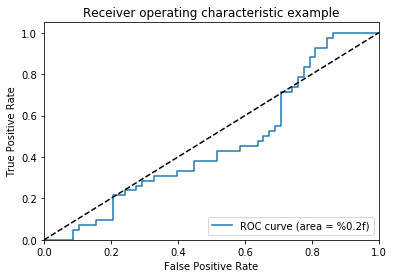

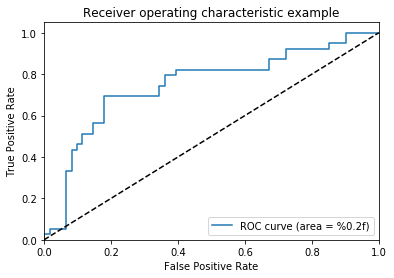

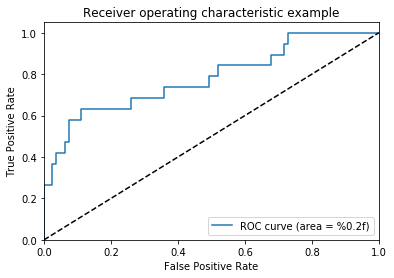

confusion matrix of :  [[25 17  0]
 [21 18  0]
 [15  4  0]]
 confusion matrix, without normalized
[[25 17  0]
 [21 18  0]
 [15  4  0]]


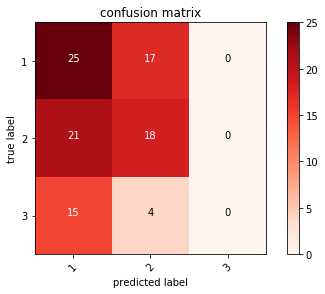

In [11]:
cvacc =[]
from sklearn.model_selection import KFold

kf=KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    model = Sequential()

    model.add(Conv2D(30, (3,3), activation ='relu', input_shape=(224,224, 3)))
    model.add(MaxPool2D(pool_size=(3, 3)))

    model.add(Conv2D(60, (3,3), activation ='relu'))
    model.add(MaxPool2D(pool_size=(3, 3)))

    model.add(Conv2D(120, (3, 3), activation ='relu'))
    model.add(MaxPool2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(100, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation ='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = one_hot_labels[train_index], one_hot_labels[test_index]
    
    history=model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1,callbacks=[tensorboard])
    print(history.history.keys())

    plt.plot(history.history['val_acc'])
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    score, acc=model.evaluate( X_test, y_test)
    print(score)
    print(acc)
    cvacc.append(acc)
    
    y_pred = model.predict_proba(X_test)
    auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
    print(auc_value)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot of a ROC curve for a specific class
    for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        
        from sklearn.metrics import confusion_matrix
    import itertools 
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    print("confusion matrix of : ",cm)

    def plot_confusion_matrix(cm, classes,
                             normalize=False,
                             title='confusion matrix',
                             cmap=plt.cm.Reds):
        # this funcation print & plots confusion matrix
        # normalize can be applied by  normalize=True,
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks= np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm= cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
            print("normalized confusion matrix")
        else:
            print(" confusion matrix, without normalized")
        print(cm)

        thresh=cm.max()/2.
        for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i,j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('true label')
        plt.xlabel('predicted label')

        '''input to confusion_matrix must be a list of predictions, not OHEs (one hot encodings). Call argmax on your y_test and y_pred, and you should get what you expect.'''

    from sklearn.utils.multiclass import unique_labels
    classes = [1,2,3]
    plot_confusion_matrix(cm,classes)






In [ ]:
 print(np.mean(auc_value))